# VERIFY Phase – Hands-On Notebook
This notebook guides you through structural, KPI, and reference verification of the cleaned dataset (`df_treat`).

## 1. Load Treated, Raw, and Reference Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


df_treat = pd.read_csv('https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments_after_treat.csv')

# FLAG: assumes both CSVs are in the same folder
df_raw = pd.read_csv('https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments_messy.csv')
df_clean_reference = pd.read_csv('https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments_v3_clean.csv')  # teacher-prepared


print(df_raw.shape, df_treat.shape, df_clean_reference.shape)

(1000, 17) (1000, 18) (200, 14)


## 2. Structural Verification
### 2a. Missingness Check

In [13]:
df_treat.isna().sum()

Unnamed: 0                    0
Shipment_ID                   0
Week                          0
Warehouse_ID                  0
Store_ID                      0
Carrier                       0
Product_Category              0
Weight_kg                     0
Delivery_Time_hrs             0
Fuel_Price_EUR_per_litre      0
Temperature_C                 0
Promo_Flag                    0
On_Time_Flag                  0
Weekly_Sales_EUR              0
Notes                         0
Dispatch_Time               990
Planned_Arrival_Time        990
Actual_Arrival_Time         990
dtype: int64

### 2b. Data Types Check

In [14]:
df_treat.dtypes

Unnamed: 0                    int64
Shipment_ID                  object
Week                         object
Warehouse_ID                 object
Store_ID                     object
Carrier                      object
Product_Category             object
Weight_kg                   float64
Delivery_Time_hrs           float64
Fuel_Price_EUR_per_litre    float64
Temperature_C               float64
Promo_Flag                    int64
On_Time_Flag                  int64
Weekly_Sales_EUR            float64
Notes                        object
Dispatch_Time                object
Planned_Arrival_Time         object
Actual_Arrival_Time          object
dtype: object

### 2c. Logical Violations Check

In [15]:
(df_treat[['Delivery_Time_hrs','Weight_kg']] < 0).sum()

Delivery_Time_hrs    0
Weight_kg            0
dtype: int64

## 3. KPI Verification

In [16]:
otif = df_treat['On_Time_Flag'].mean()
avg_dt = df_treat['Delivery_Time_hrs'].mean()
eur_per_kg = (df_treat['Weekly_Sales_EUR'] / df_treat['Weight_kg']).mean()

otif, avg_dt, eur_per_kg

(0.163, 28.3465, 4708.492969091823)

## 4. Distribution Comparison

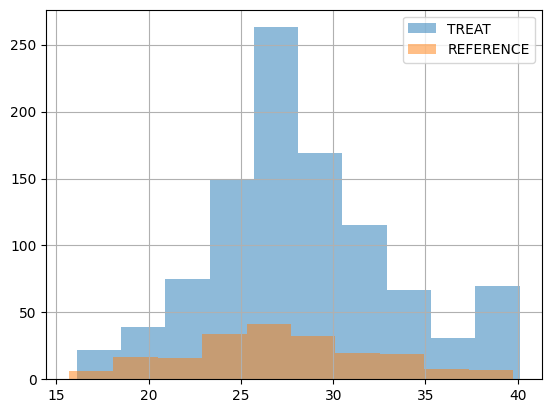

In [17]:
df_treat['Delivery_Time_hrs'].hist(alpha=0.5, label='TREAT')
df_clean_reference['Delivery_Time_hrs'].hist(alpha=0.5, label='REFERENCE')
plt.legend()
plt.show()

## 5. Category-Level Verification

In [18]:
df_treat.groupby('Product_Category')['Weight_kg'].median()

Product_Category
Clothing       14.810
Electronics    15.000
Frozen         14.875
Grocery        15.060
Name: Weight_kg, dtype: float64

In [19]:
df_clean_reference.groupby('Product_Category')['Weight_kg'].median()

Product_Category
Clothing       16.34
Electronics    15.00
Frozen         15.13
Grocery        15.91
Name: Weight_kg, dtype: float64

## 6. Final Verification Summary

In [20]:
summary = {
    'missing': df_treat.isna().sum().sum(),
    'negative_delivery': (df_treat['Delivery_Time_hrs']<0).sum(),
    'negative_weight': (df_treat['Weight_kg']<=0).sum(),
    'otif': otif,
    'avg_delivery_time': avg_dt
}
summary

{'missing': 2970,
 'negative_delivery': 0,
 'negative_weight': 0,
 'otif': 0.163,
 'avg_delivery_time': 28.3465}